<a href="https://colab.research.google.com/github/sanaa-04/ML-Project/blob/main/Copy_of_Yes_bank_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Sumarry :-**

Yes bank is an well knwon bank in india which provides wide range of serivce and solutions right from bank accounts, deposits, card, cash managements, privillages banking trade finances, Non-Resident india (NRI) banking, institutionals banking, acquiring, digital banking and agriculture baning solutins. as the date is all about the stock price. So, in the project will be analying pattern of the dataset by performacing exploratory data analysis and try to build a model with help of meching learning for predicting the costing stock price.

The tools for data analysis and model building used in this project are the packages fron the python libaray as Numpy, pandas, matplotlib, Seaborn, linear Regression, lasso ridges, ElasticNet, minmaxscaler etc.

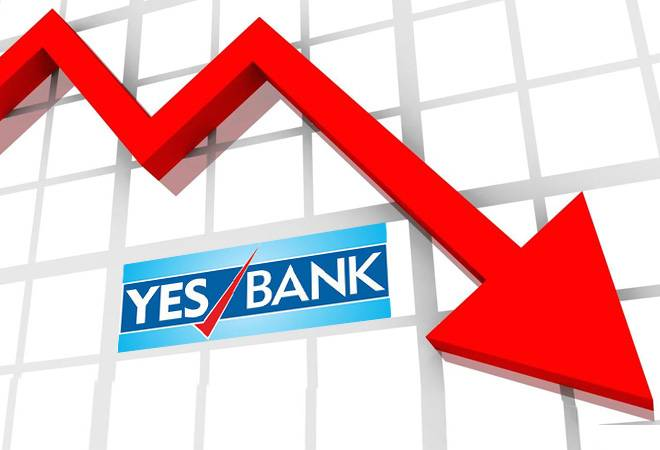

**Problem Statement:-**

The given dataset contains stokc price informations in the various columns by monthly date. There are 5 columns in the dataset such as date open, high, low, closing price. our target variable here is the closing price columns which we wiil try to predict for future. So, first we will perform
some exploratory data analysis to the data, try find out the same pattern as well as see the relations between the various columns and the target value column. Then we will be building a model through we will be able to predict or provide a decent estimate of the clossing price which is our target variable.

***Let's Begin***



1.   **know your data**




Import libaray

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/almabetter 1/datasets/YesBank_StockPrices.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Datasets details information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


*  We have a total of 185 entries. <br>
*  No null values. <br>
*  Date column is of 'object' datatype we have to convert it to 'datetime'.


# Finding Null values

In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**There is no missing value in datasets**

# Finding The duplicate

In [ ]:
df.duplicated().sum()

0

# Number of Row & columns

In [ ]:
# number of rows and columns in the dataset
no_of_columns = df.shape[1]
print(no_of_columns)
no_of_rows = df.shape[0]
print(no_of_rows)

5
185


# What did you know about your datasets ?


Our Dataset contains 185 row and 5 columns with different variable types. there are no missing values as well as duplicate values in the dataset. There are two types of informations insight the columns as float or object. Basically the given datasets is providing us the overview of the stock price details information and by generating insight from those we will try to see the relationship between our target variable(clossing price) and the independent variables that are other four columns then we will try to predict or provide estimates of the future clossing price by building machine learning algorithm model

 # **2. Undarstanding Your variable**



# Dataset Describe

In [ ]:
# brief summary of the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# Variable description

The name of the individual variables mentioned in the columns of datasets and
the description of them are list below:


*   Date: Month and day information on which it was recorded(categorical)
*   Open: openning stock price(Numerical)


*   High: Highes stock price(numerical)
*   Low : lowest stock price(numerical)

*   Clossing : Clossing stock price(numerical)







### Check Unique Value For each Variable  

In [ ]:
for item in list(df.columns):
  print("The number of unique value in column", item, "is", df[item].nunique())

The number of unique value in column Date is 185
The number of unique value in column Open is 183
The number of unique value in column High is 184
The number of unique value in column Low is 183
The number of unique value in column Close is 185


## Data Wrangling

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# convert string object to datetime object
from datetime import datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))
df_copy.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


# What all manipulation have you done and what insigts you found ?

The given datasets does not have any missing values or null values. Also there are no duplicate values in the datasets as I have already checked
Since Date columns was in string format then it is change in datetimestamp format.that will be helpful in further analysis.

# **4. Data visualization, Storytelling & experimenting with charts: Understanding the relationship between variables**

## Univariate Analysis

<ipython-input-219-3879c32edf10>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Close', ylabel='Density'>

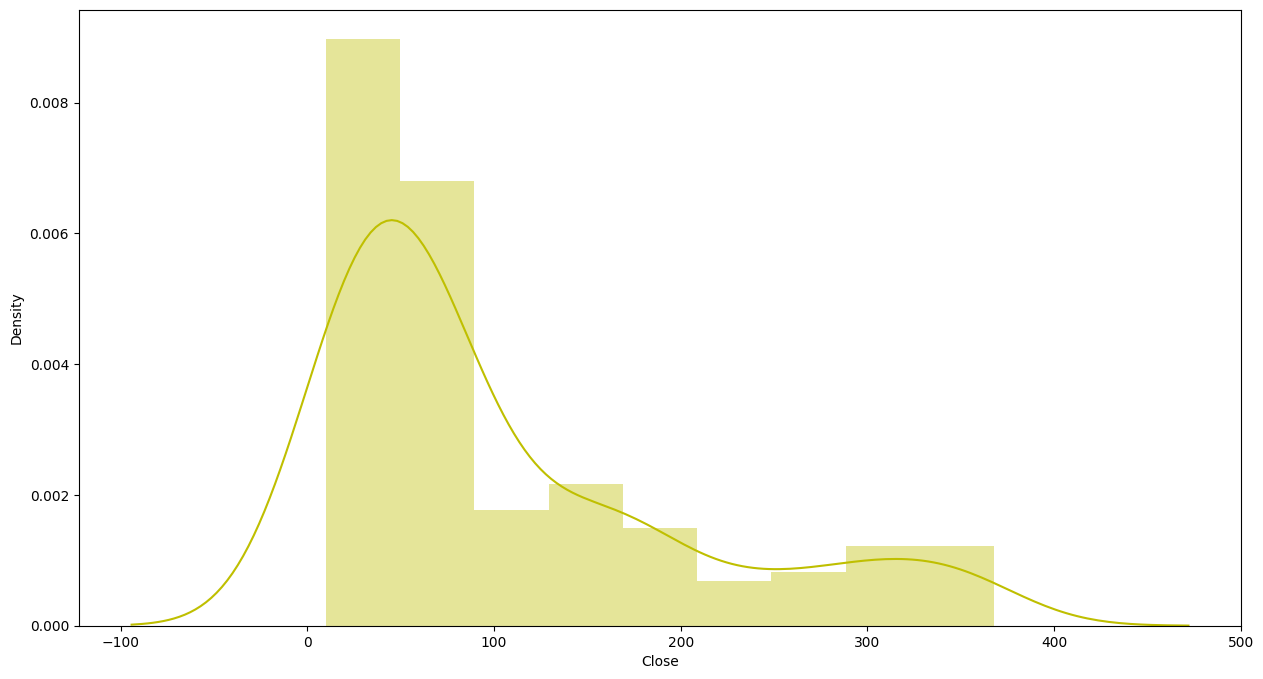

In [ ]:
#chart1 Data Visualization
plt.figure(figsize=(15,8))
sns.distplot(df_copy['Close'],color="y")

# 1.why did you taken the specific chart?

to see the distribution of Clossing price in the dataset I have using the dist plot for finding the skewness in the data and using the dist plot a figure-level function with
similar flexibility.



# 2. What is the insight founds from the chart?
Above charts shows that the 'Close' cloumn data is positive skewness shows.So Transforming the Clossing into the log scale to handling the skewness.

# 3.Will be gaining postive bussines impact due to what insight we getting through the chart ? or any Negative growth will present? justfiy it.

Yes the gain insight shows the postive skewness distribution of the 'Close' column that it will help to understanding and method to applied to handling the skewness of the data.

# chart 2

In [ ]:
numeric_features = df_copy.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

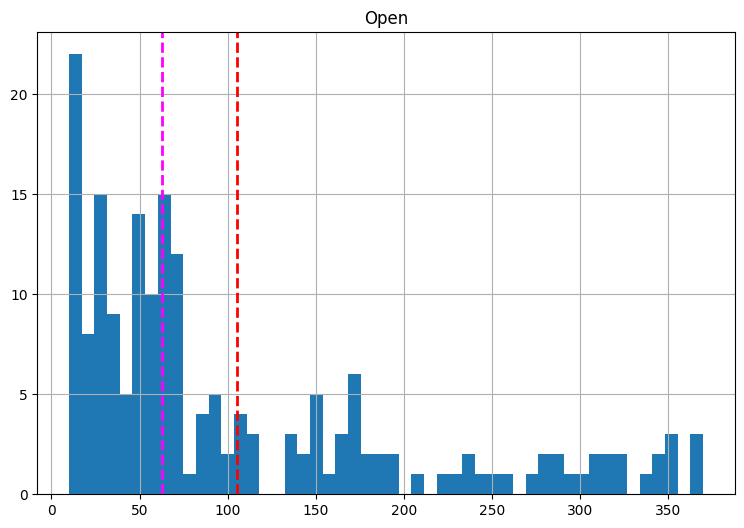

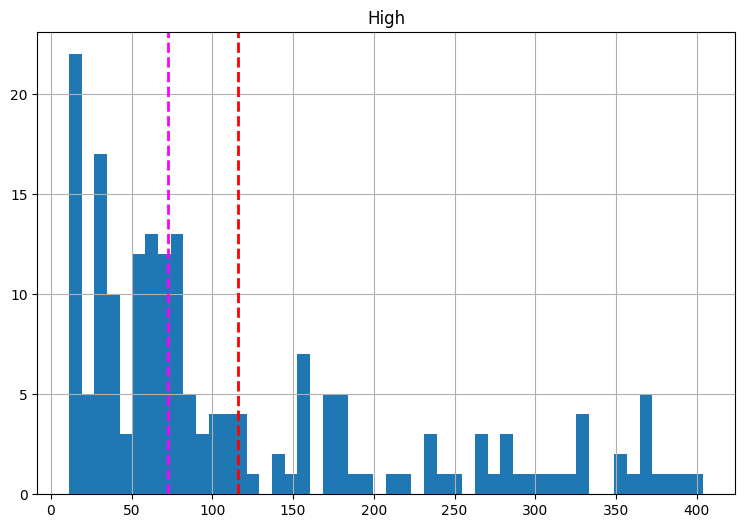

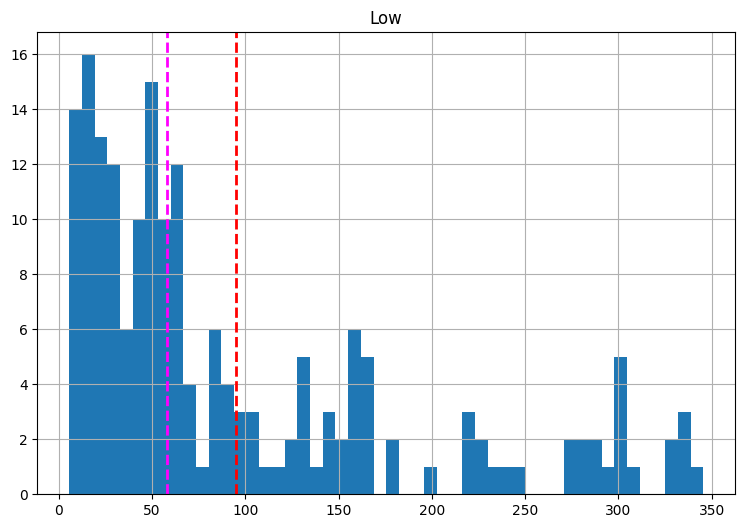

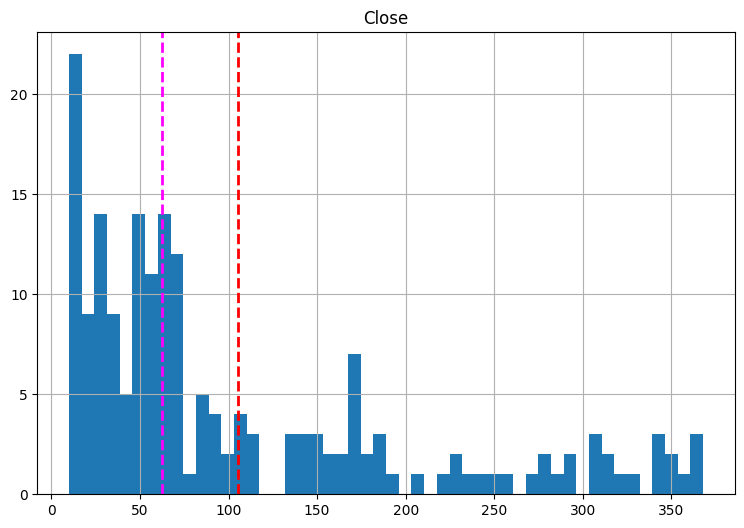

In [ ]:
# Data visaliation code
for col in numeric_features:
   fig = plt.figure(figsize=(9,6))
   ax = fig.gca()
   feature = df_copy[col]
   feature.hist(bins=50, ax = ax)
   ax.axvline(feature.mean(), color='Red', linestyle='dashed',linewidth=2)
   ax.axvline(feature.median(), color='Magenta', linestyle='dashed',linewidth=2)
   ax.set_title(col)
plt.show()

# 1.why did you taken the specific chart?

Histogram is data visualiation tool So the chart will show the overview of each and every variable information and gives a clear idea  about the dataset.it is summarize the data measure on interval scale.

# 2.What is insight found from the histogram?

Above chart it can be clearly seen that all the numeric variable are positively skewed.Handling the variation of data values using log scale to patternized the curve at chart.

# 3. Will gained insight help creating postive bussiness impact? Are there any insight that lead to negative growth? justify

Yes the gain insight  shows the positively skewed distribution of all numeric columns that will help me to understand and method to applied to handling the skewness of data.

# Chart 3

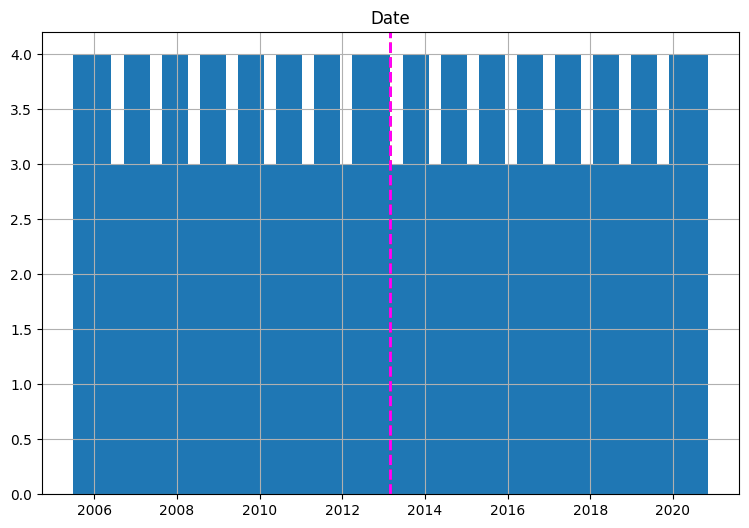

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df_copy['Date']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='Red', linestyle='dashed',linewidth=2)
ax.axvline(feature.median(), color='Magenta', linestyle='dashed',linewidth=2)
ax.set_title("Date")
plt.show()

# 1.why did you taken the specific chart?

to see the distribution of data column which is categorical in the datasets.to plot a dist plot.

# 2.What is insight found from the chart?

As the data column is categorical information and from the distogram plot it clear that data column is equally distributed.


## Bivariate Analysis

In [ ]:
!pip install plotly.express
import plotly.express as px

# Chart 4

In [ ]:
ax = px.line(df_copy, df_copy['Date'],df_copy['Close'],title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()

# 1.why did you taken the specific chart?
Bivariate is the creating the chart using to two variable.the above plot show the relationship between data column and closing price

# 2.What is insight found from the chart?
 The above chart it can be seen that there were consistent overall in the stock price till 2024 ofcourse  with some downfalls but after 2014 the stock price started raise high and from 2016 and 2018 the growth  was very impressive some times the stocks raised to over 350. But in the year of 2020 there were heavly downfall in the stock prices. the reason must be the fraud case for which one of the founder of the bank  was arrested which is all known.

# 3. Will gained insight help creating postive bussiness impact? Are there any insight that lead to negative growth? justify

Yes the gained insight is showing the overall trends of the stock price throughout the year by just seeing the trend we can have an idea as when to invest for buying yes bank shares.

# Chart 5

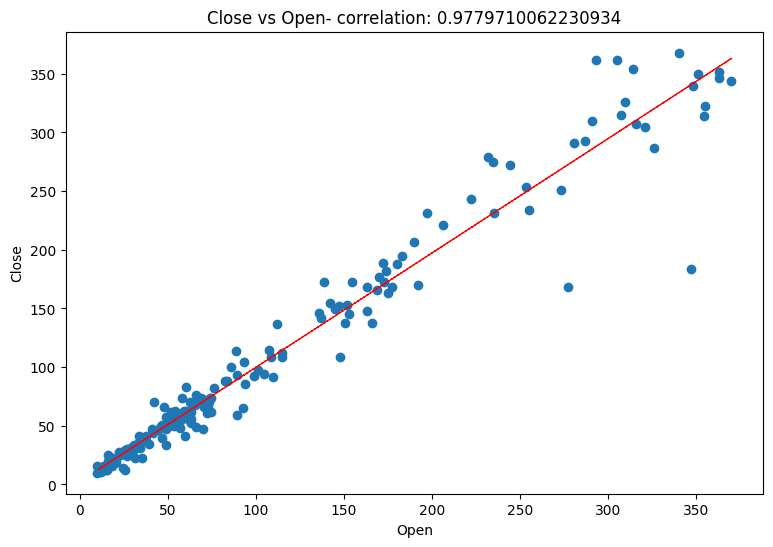

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df_copy['Open']
label = df_copy['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y = label)
plt.xlabel('Open')
plt.ylabel('Close')

ax.set_title('Close vs ' + 'Open' + '- correlation: ' + str(correlation))
z = np.polyfit(df_copy['Open'], df_copy['Close'],1)
y_hat = np.poly1d(z)(df_copy['Open'])
plt.plot(df_copy['Open'], y_hat, "r--", lw=1)
plt.show()

 # 1.why did you taken the specific chart?
 the above scatter plot the relation between the open and close

# 2.What is insight found from the chart?
we can see the open and close data are highly  correlated the therefore
we can say that the clossing price dependent upon the opening price of the stock

# 3. Will gained insight help creating postive bussiness impact? Are there any insight that lead to negative growth? justify
yes the high correlation between the open and close stock the opening price show the base line it wil clossing stock more price as compare to opening price still it will be positive otherwise negative

# Chart 6

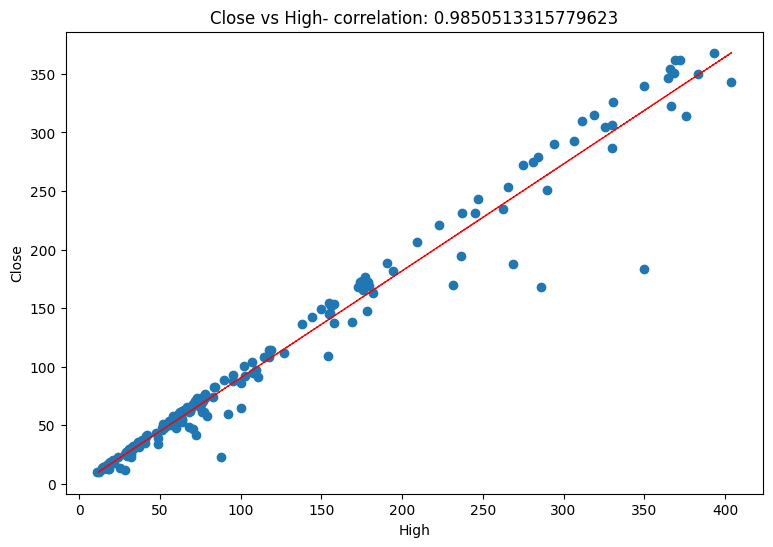

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df_copy['High']
label = df_copy['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y = label)
plt.xlabel('High')
plt.ylabel('Close')

ax.set_title('Close vs ' + 'High' + '- correlation: ' + str(correlation))
z = np.polyfit(df_copy['High'], df_copy['Close'],1)
y_hat = np.poly1d(z)(df_copy['High'])
plt.plot(df_copy['High'], y_hat, "r--", lw=1)
plt.show()

# 1.why did you taken the specific chart?

The above scatter plot  shows the relation between the high and close.


# 2.What is insight found from the chart?
As we can see that high and close data are highly correlated therefore we can say that the closing price is also very much dependant on the high price
of the stock.

# 3. Will gained insight help creating postive bussiness impact? Are there any insight that lead to negative growth? justify

Yes high correlation between the high and price indicates that high price will always play an deimportant role in stock price.


# chart 7

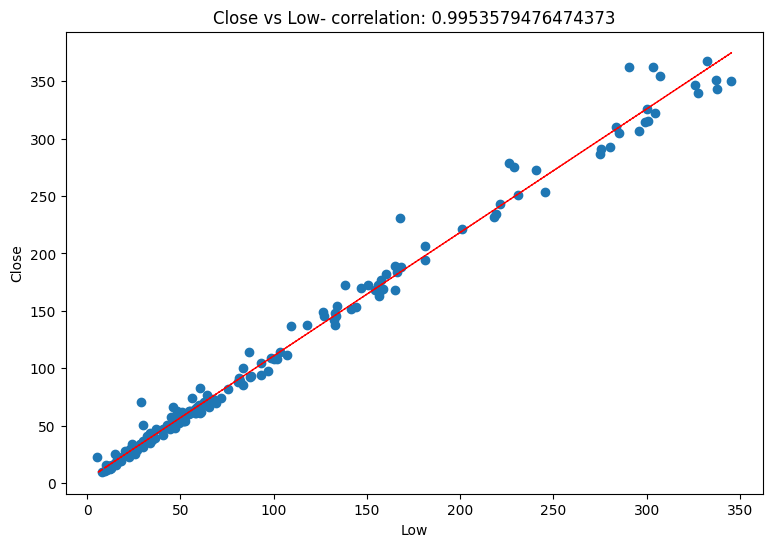

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df_copy['Low']
label = df_copy['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y = label)
plt.xlabel('Low')
plt.ylabel('Close')

ax.set_title('Close vs ' + 'Low' + '- correlation: ' + str(correlation))
z = np.polyfit(df_copy['Low'], df_copy['Close'],1)
y_hat = np.poly1d(z)(df_copy['Low'])
plt.plot(df_copy['Low'], y_hat, "r--", lw=1)
plt.show()

# 1.why did you taken the specific chart?

above scatter plot shows the relations between low and close


# 2.What is insight found from the chart?
Also we can see that the low and close are also highly correlated therefore we can say that the closing price dependent on the low price of the stock

# 3. Will gained insight help creating postive bussiness impact? Are there any insight that lead to negative growth? justify

Yes the high correlation between the low and  price indicates that low price will also play an important role to have an idea about  closing price.


### Correlation Heatmap

<ipython-input-228-d4b9f8bbf753>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

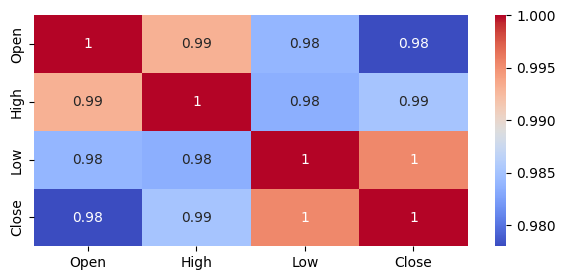

In [ ]:
plt.figure(figsize=(7,3))
sns.heatmap(df_copy.corr(),annot = True, cmap= 'coolwarm')

# 1.why did you taken the specific chart?

Correlated heatmap are a type of plot that visualize the strenght of relationship between numerical variables correlation plots are used to under stand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with  each  variables represented by a column. The rows represent the relationship between  each pair of  variables. The values in the cells  indicates the strength of the relationship with positive values indicates  positive relationship and negative values indicating a negative relationship.
Therefore to show the relations between  the  variables we have used this plot.


# 2.What is insight found from the chart?

from the above chart we can see that each and every feature here is highly  correlated  to each  other. As the  linear Regression assumes that there is no multicolinearity therefore we will try to reduce the multinearity using transformation of variables and generating new features.

# Chart 9

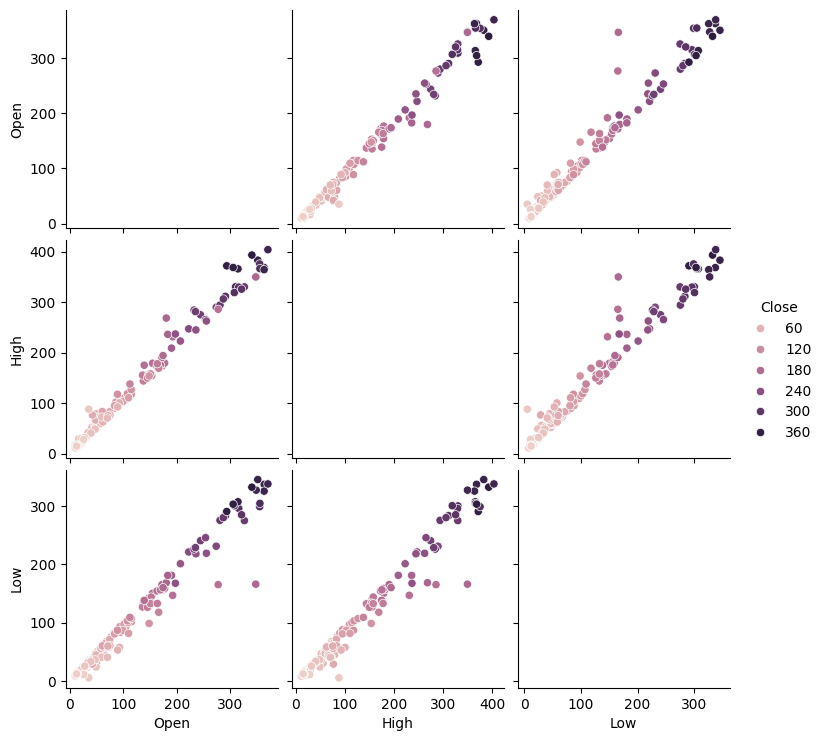

In [ ]:
sns.pairplot(df_copy,hue='Close')

#1.why did you taken the specific chart?
Pairplot is used to understand the best set of features to explain a relationship between tweo variables or to from the most separated clusters the pairplot visualize given data to find the relationship between then where the variable can be continous or categorical

# 2.What is insight found from the chart?
I have used close in the hue variable so the above plot will show the distribution of close with the different type of column

### **Feature Engineering and data Pre-processing**

handling missing values

there are no missing values and null values in the dataset

handling outliers

In [ ]:
fig= px.box(df_copy['Open'])
fig.update_layout(xaxis =dict(title='Boxplot'))
fig.show()

In [ ]:
fig= px.box(np.log10(df_copy['Open']),title='applied log10')
fig.update_layout(xaxis = dict(title='Boxplot'))
fig.show()

In [ ]:
fig= px.box(df_copy['High'])
fig.update_layout(xaxis =dict(title='Boxplot'))
fig.show()

In [ ]:
fig= px.box(np.log10(df_copy['High']),title='applied log10')
fig.update_layout(xaxis = dict(title='Boxplot'))
fig.show()

In [ ]:
fig= px.box(df_copy['Low'])
fig.update_layout(xaxis =dict(title='Boxplot'))
fig.show()

In [ ]:
fig= px.box(np.log10(df_copy['Low']),title='applied log10')
fig.update_layout(xaxis = dict(title='Boxplot'))
fig.show()

<ipython-input-236-8d87d7745b94>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Close', ylabel='Density'>

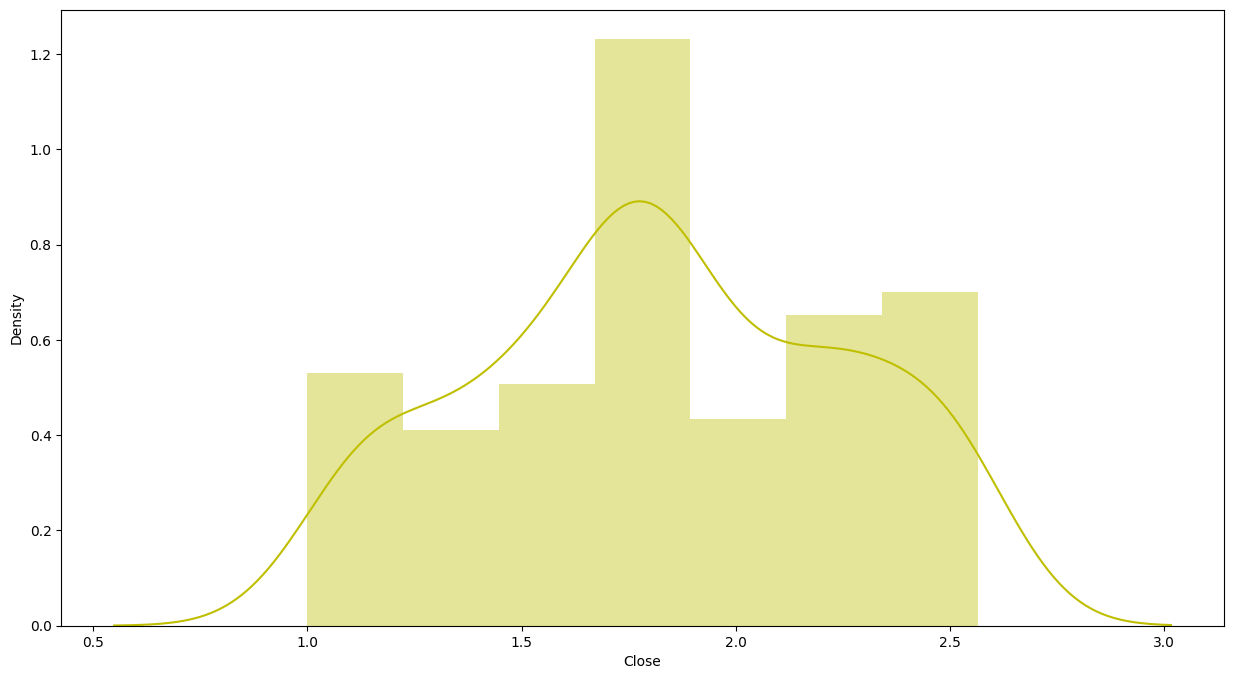

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(np.log10(df_copy['Close']),color="y")

In [ ]:
df_copy.set_index('Date', inplace= True)

In [ ]:
df_copy['Average'] = df_copy[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [ ]:
df_copy.head()

,Open,High,Low,Close,Average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37


In [ ]:
dependent_variable = 'Close'

In [ ]:
independent_variable = list(set(df_copy.columns.tolist())-{dependent_variable})

In [ ]:
list(independent_variable)

['Open', 'Average', 'High', 'Low']

In [ ]:
x = np.log10(df_copy[independent_variable]).values


In [ ]:
y = np.log10(df_copy[dependent_variable]).values

# What all outlier treatment techniques have you  used and why did you use those techniques?
These were Three independent features that had outlier shown in the above boxplot. So to handle the outliers as well as to tackle the skewness of the data I have transformed all the numerice features to log base 10 values

Ater the conversion of numeric features I have also visualized them through the box plot that shows no outlier also the price column information can be seen as an approx normal distribution.

# Features Manipulation & selection

 # 1.Features manipulation

In [ ]:
# manipulate features to minimize features correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
calc_vif(df_copy[[i for i in df_copy.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,Average,2.993476e+09


# Data transformation

In [ ]:
x = np.log10(df_copy[independent_variable]).values
y = np.log10(df_copy[dependent_variable]).values

### Data Splitting

In [ ]:
# Splitting the data by train_test_split libaray
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

data is splitting in ratio 80:20. 80% is using as train data and rest of data is using in test

Data Scaling

In [ ]:
# Data scaling done by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Data scaling is doing to set that range of data from minimum to maximum values. using the MinMaxScaler libaray.

# ML model Implementation
**Model 1**

Linear Regression

In [ ]:
# model based on linearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

0.9797572199457665

In [ ]:
regressor.coef_

array([-1.46550815,  1.8295131 ,  0.31613169,  0.90459122])

In [ ]:
y_pred_train = regressor.predict(x_train)

y_pred = regressor.predict(x_test)

In [ ]:
# Predict the close price on train data set
y_pred_train

array([2.16666583, 1.29226941, 1.82954242, 1.70764376, 1.18120523,
       1.8125145 , 1.71214451, 1.59566436, 1.55910017, 1.15958467,
       1.95752107, 1.14429528, 1.55823795, 1.46869362, 2.50928649,
       1.8695972 , 2.54392622, 1.41033706, 1.6539094 , 1.74612675,
       2.51247873, 1.13452153, 2.03409353, 1.52619683, 2.05652419,
       1.78377774, 2.53135087, 1.82975023, 2.02449454, 2.15802001,
       1.5866463 , 1.97549084, 2.03218456, 2.13046501, 1.19257157,
       1.9839501 , 1.8463336 , 1.1344837 , 1.75275236, 1.90024956,
       2.26106725, 1.02722247, 1.25162797, 2.02085969, 1.73254093,
       1.4555927 , 2.04346852, 2.22522384, 2.11075371, 1.68312785,
       2.57583208, 1.41684846, 1.57800328, 2.18217407, 1.97007091,
       1.80845394, 2.29980869, 1.14999395, 1.82266221, 1.50701132,
       1.44884024, 1.83968301, 1.25401382, 2.46674683, 1.52119224,
       1.15264568, 2.11003104, 1.41435202, 1.35386515, 1.77425201,
       1.88646658, 1.69595399, 1.84210302, 1.74497904, 1.13575

In [ ]:
# Predict the close price on test data set
y_pred

array([1.49784854, 2.14727049, 1.65824244, 2.15046083, 1.82972255,
       1.51475157, 2.36353393, 1.23813387, 1.15999689, 2.34121465,
       2.47300902, 1.94260725, 2.18470366, 1.77368177, 2.52811643,
       2.42072311, 1.87149105, 1.45494274, 2.42212967, 1.71036124,
       0.97975722, 2.074786  , 2.16861637, 1.77881212, 2.33710918,
       1.6880584 , 2.39657385, 1.14841884, 2.03447502, 1.72407792,
       2.56448509, 2.53904926, 1.87147782, 2.2228243 , 1.60044853,
       1.68552683, 2.41508118])

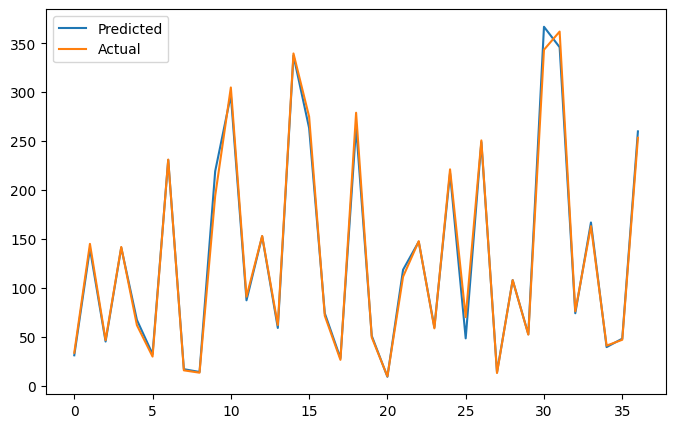

In [ ]:
# visualize the comparion between actual values and predicted values of the target values
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# check for homoscadacity
fig =px.scatter(x=10**(y_test),y=10**(y_pred),labels={'x':'Actual_value','y':'predication'})
fig.add_shape(type='line', line = dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

# explain the Ml model used and its performance using evaluation metric Score chart.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lr_mse = mean_squared_error(10**(y_test), 10**(y_pred))
lr_mse

69.24398005954768

In [ ]:
train_mse = mean_squared_error(10**(y_train), 10**(y_pred_train))
train_mse

44.40573158904343

In [ ]:
# Train Performance
rmse_train = np.sqrt(train_mse)
rmse_train

6.663762569978272

In [ ]:
lr_rmse = np.sqrt(lr_mse)
lr_rmse

8.321296777518976

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
lr_mae = mean_absolute_error(10**(y_test), 10**(y_pred))
lr_mae

5.019356564473205

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mape = mean_absolute_percentage_error(10**(y_train),10**(y_pred_train))
mape

0.04709625503648755

In [ ]:
lr_mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred))
lr_mape

0.04556849155665933

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, y_pred_train)

0.9951721981228238

In [ ]:
lr_r2_score = r2_score(y_test, y_pred)
lr_r2_score

0.9941349007015138

In [ ]:
Matrix_score = pd.DataFrame({'Mean Squared Error':[lr_mse],'Root Mean Squared Error':[lr_rmse], 'Mean Absolute Error':[lr_mae], 'Mean Absolute Percentage Error':[lr_mape], 'R2 Score':[lr_r2_score]})

In [ ]:
Matrix_score

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
0,69.24398,8.321297,5.019357,0.045568,0.994135


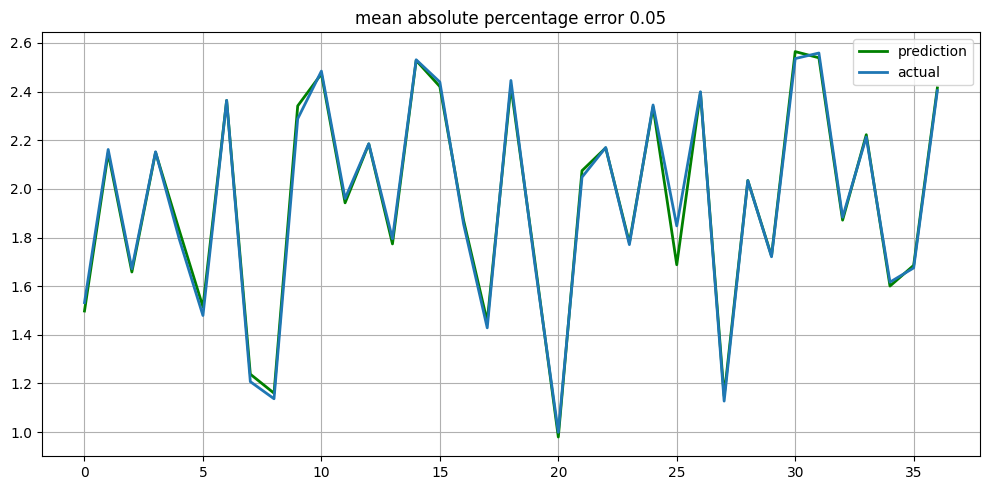

In [ ]:
def plotModelResults(model, X_train=x_test, X_test=x_test, plot_intervals=False):
    # Plot modelled vs actual values
    prediction = model.predict(x_test)
    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)
    plt.title("mean absolute percentage error {0:.2f}".format(lr_mape))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(regressor, plot_intervals=True)

**Ridge Regression with Cross Validation**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error', cv=3)

In [ ]:
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0011773450928997747


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge

array([1.4638244 , 2.13702464, 1.64788531, 2.1341437 , 1.79904579,
       1.47174318, 2.3585135 , 1.18323205, 1.10400981, 2.33109343,
       2.47492787, 1.93302564, 2.1708912 , 1.74623954, 2.52848607,
       2.41514597, 1.8443408 , 1.40967812, 2.41652916, 1.68331909,
       0.92645733, 2.05783089, 2.1635678 , 1.74623776, 2.32796647,
       1.65714314, 2.39861777, 1.0915782 , 2.01628091, 1.70299479,
       2.56877097, 2.53694504, 1.84380228, 2.21422075, 1.56374507,
       1.65432108, 2.40918778])

<ipython-input-282-a2699b87d00a>:4: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



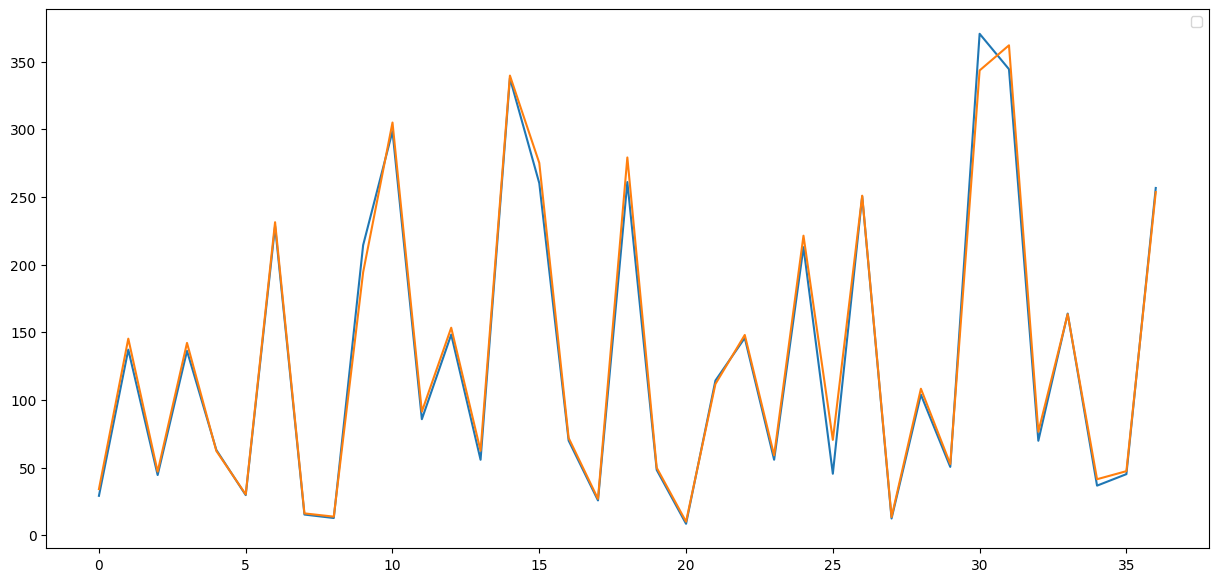

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(y_test))
plt.legend('Predicted','Actual')
plt.show()

# 1.Explain the ML model used and it's performance using evalution metric score chart

In [ ]:
ridge_mse = mean_squared_error(10**(y_test),10**(y_pred_ridge))

In [ ]:
print("Ridge_mse :",ridge_mse)

Ridge_mse : 84.50309028543369


In [ ]:
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge_rmse :",ridge_rmse)

Ridge_rmse : 9.19255624325648


In [ ]:
ridge_mae = mean_absolute_error(10**(y_test),10**(y_pred_ridge))
print("Ridge_mae :",ridge_mae)

Ridge_mae : 6.055799365277861


In [ ]:
ridge_r2_score = r2_score(10**(y_test),10**(y_pred_ridge))
print("Ridge_r2_score :",ridge_r2_score)

Ridge_r2_score : 0.9924925530951701


In [ ]:
ridge_mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred_ridge))
print("Ridge_mape :",ridge_mape)

Ridge_mape : 0.05977403700219557


In [ ]:
Matrix_score_ridge = pd.DataFrame({'Mean Squared Error':[ridge_mse], 'Root Mean Squared Error':[ridge_rmse],'Mean Absolute Error':[ridge_mae], 'R2 Score':[ridge_r2_score],'Mean Absolute Percentage Error':[ridge_mape]})
Matrix_score_ridge

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score,Mean Absolute Percentage Error
0,84.50309,9.192556,6.055799,0.992493,0.059774


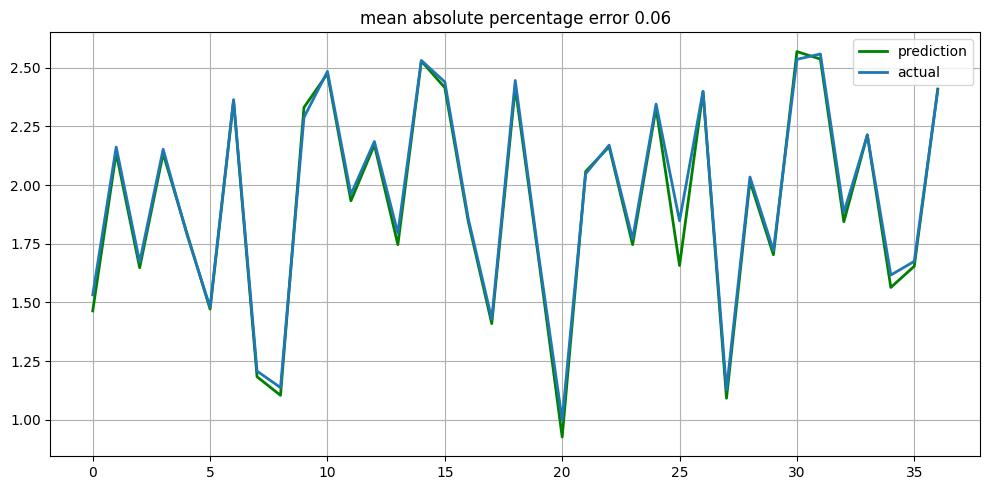

In [ ]:
# funtion to plot model performance
def plotModelResults(model, X_train= x_test, X_test = x_test, plot_intervals =False):

         #plot modelled v/s fact values
         prediction = model.predict(x_test)
         plt.figure(figsize=(10,5))
         plt.plot(prediction,"g",label="prediction",linewidth=2.0)
         plt.plot(y_test, label ="actual", linewidth=2.0)
         plt.title("mean absolute percentage error {0:.2f}".format(ridge_mape))

         plt.legend(loc="best")
         plt.tight_layout()
         plt.grid(True);


plotModelResults(ridge_regressor,plot_intervals=True)

**Lasso Regression With Cross validation**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.1, max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso

array([1.76710489, 1.84888376, 1.80043915, 1.84534409, 1.80223852,
       1.76146947, 1.87389823, 1.72799419, 1.71944392, 1.86564042,
       1.88956169, 1.82823586, 1.85040197, 1.79964939, 1.89478745,
       1.87737281, 1.80977448, 1.75497516, 1.8772191 , 1.79284006,
       1.70144708, 1.83606058, 1.85282693, 1.79616623, 1.86831564,
       1.78930838, 1.88089638, 1.71835563, 1.83196141, 1.79882945,
       1.8991951 , 1.89095992, 1.80803896, 1.85714972, 1.77542922,
       1.78833783, 1.87881613])

In [ ]:
lasso.score(x_train, y_train)

0.24239155193667772

<ipython-input-295-3e94b3035b65>:4: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



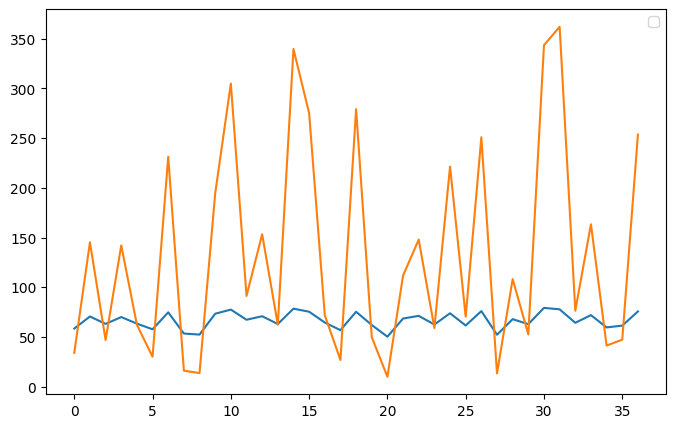

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(y_test))
plt.legend('Predicted','Actual')
plt.show()

In [ ]:
lasso_mse = mean_squared_error(10**(y_test),10**(y_pred_lasso))
lasso_mse

14061.091933730775

In [ ]:
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

118.57947517901559

In [ ]:
lasso_mae = mean_absolute_error(10**(y_test),10**(y_pred_lasso))
lasso_mae

82.82180745365362

In [ ]:
lasso_r2_score = r2_score(10**(y_test), 10**(y_pred_lasso))
lasso_r2_score

-0.2492194162349144

In [ ]:
lasso_mape = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lasso))
lasso_mape

0.7669807028294885

In [ ]:
Matrix_score_lasso = pd.DataFrame({'Mean Squared Error':[lasso_mse], 'Root Mean Squared Error':[lasso_rmse],'Mean Absolute Error':[lasso_mae], 'R2 Score':[lasso_r2_score],'Mean Absolute Percentage Error':[lasso_mape]})

In [ ]:
Matrix_score_lasso

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score,Mean Absolute Percentage Error
0,14061.091934,118.579475,82.821807,-0.249219,0.766981


**Lasso Regression with Cross Validation and Hyperparameter Tuning**

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring ='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.331e-02, tolerance: 1.784e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.373e-02, tolerance: 1.659e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.542e-02, tolerance: 1.729e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.000991149779507814


In [ ]:
y_pred_lasso1 = lasso_regressor.predict(x_test)

In [ ]:
y_pred_lasso1

array([1.49170566, 2.1451856 , 1.65493244, 2.14779807, 1.82507617,
       1.50825073, 2.36266723, 1.22903818, 1.15051891, 2.34059813,
       2.47311426, 1.94015378, 2.18238573, 1.76888895, 2.52808955,
       2.42052102, 1.86702199, 1.44773424, 2.42201899, 1.70559261,
       0.97044352, 2.07213459, 2.16754533, 1.7737457 , 2.33584128,
       1.68440768, 2.39673189, 1.1386752 , 2.03137763, 1.7197761 ,
       2.56539182, 2.53975179, 1.8673409 , 2.22123381, 1.59443252,
       1.68009497, 2.41423348])

<ipython-input-307-45741d1092d9>:4: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



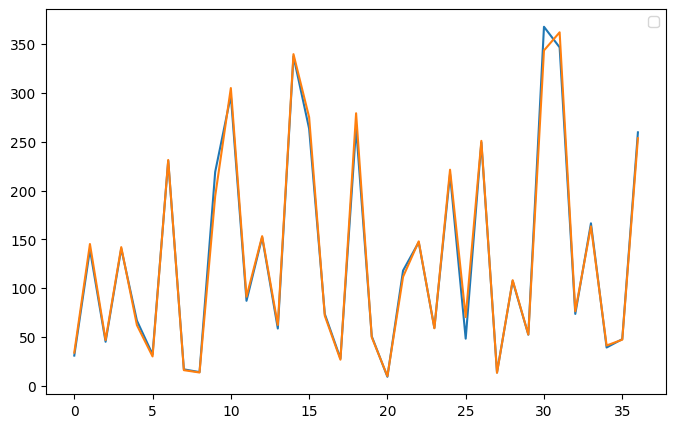

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso1))
plt.plot(10**(y_test))
plt.legend('Predicted','Actual')
plt.show()

In [ ]:
lasso1_mse = mean_squared_error(10**(y_test),10**(y_pred_lasso1))
lasso1_mse

69.78200829173686

In [ ]:
lasso1_rmse = np.sqrt(lasso1_mse)
lasso1_rmse

8.353562610750988

In [ ]:
lasso1_mae = mean_absolute_error(10**(y_test),10**(y_pred_lasso1))
lasso1_mae

5.042208183134293

In [ ]:
lasso1_r2_score = r2_score(10**(y_test), 10**(y_pred_lasso1))
lasso1_r2_score

0.9938004075307418

In [ ]:
lasso1_mape = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lasso1))
lasso1_mape

0.043857073126816214

In [ ]:
Matrix_score_lasso1 = pd.DataFrame({'Mean Squared Error':[lasso1_mse], 'Root Mean Squared Error':[lasso1_rmse],'Mean Absolute Error':[lasso1_mae], 'R2 Score':[lasso1_r2_score],'Mean Absolute Percentage Error':[lasso1_mape]})

In [ ]:
Matrix_score_lasso1

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score,Mean Absolute Percentage Error
0,69.782008,8.353563,5.042208,0.9938,0.043857


In [ ]:
# check for homoscadacity
fig =px.scatter(x=10**(y_test), y=10**(y_pred_lasso1), labels ={'X':'Actual_value','y':'prediction'})
fig.add_shape(type ='line',line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

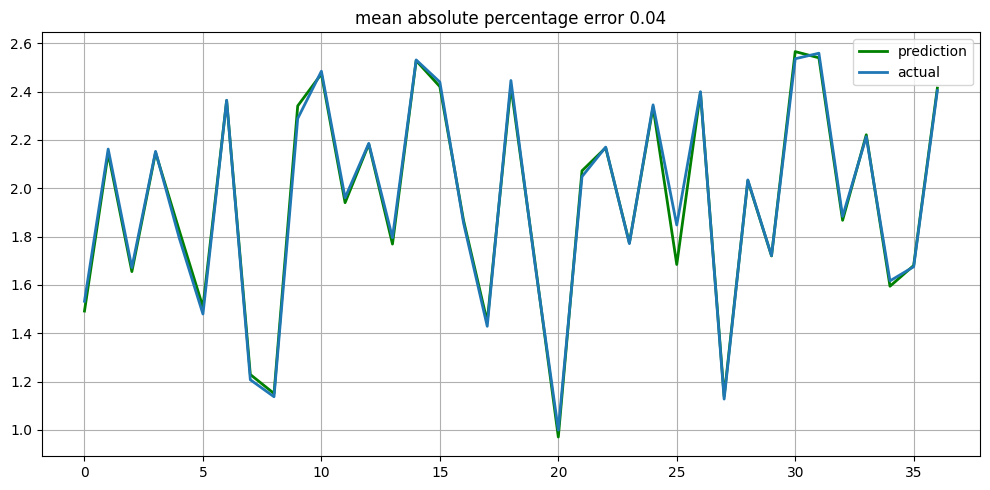

In [ ]:
# funtion to plot model performance
def plotModelResults(model, X_train= x_test, X_test = x_test, plot_intervals =False):

         #plot modelled v/s fact values
         prediction = model.predict(x_test)
         plt.figure(figsize=(10,5))
         plt.plot(prediction,"g",label="prediction",linewidth=2.0)
         plt.plot(y_test, label ="actual", linewidth=2.0)
         plt.title("mean absolute percentage error {0:.2f}".format(lasso1_mape))

         plt.legend(loc="best")
         plt.tight_layout()
         plt.grid(True);


plotModelResults(lasso_regressor,plot_intervals=True)

**Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio= 0.5)

In [ ]:
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
elastic_net.score(x_train, y_train)

0.6978244827056186

In [ ]:
y_pred_en = elastic_net.predict(x_test)

<ipython-input-322-32fbec1cf884>:4: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



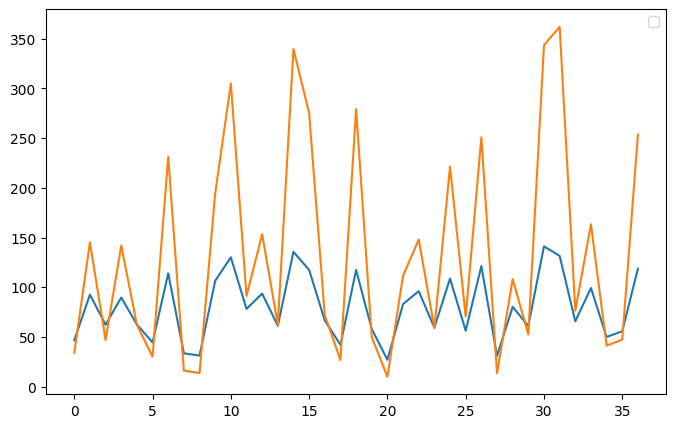

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(y_test))
plt.legend('Predicted','Actual')
plt.show()

**Elastic Net with Cross Validation and Hyperparameter Tuning**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
en_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
en_regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.884e-02, tolerance: 2.074e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.453e-02, tolerance: 2.149e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.956e-02, tolerance: 2.007e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = en_regressor.predict(x_test)
y_pred_elastic

array([1.49170566, 2.1451856 , 1.65493244, 2.14779807, 1.82507617,
       1.50825073, 2.36266723, 1.22903818, 1.15051891, 2.34059813,
       2.47311426, 1.94015378, 2.18238573, 1.76888895, 2.52808955,
       2.42052102, 1.86702199, 1.44773424, 2.42201899, 1.70559261,
       0.97044352, 2.07213459, 2.16754533, 1.7737457 , 2.33584128,
       1.68440768, 2.39673189, 1.1386752 , 2.03137763, 1.7197761 ,
       2.56539182, 2.53975179, 1.8673409 , 2.22123381, 1.59443252,
       1.68009497, 2.41423348])

In [ ]:
print("The best fit value of alpha is found to be :" ,en_regressor.best_params_)
print("\nUsing", en_regressor.best_params_," the negative mean squared error is: ",en_regressor.best_score_)

The best fit value of alpha is found to be : {'alpha': 1e-15}

Using {'alpha': 1e-15}  the negative mean squared error is:  -0.0009055538272913237


In [ ]:
elastic_mse = mean_squared_error(10**(y_test),10**(y_pred_elastic))
elastic_mse

69.78200829175172

In [ ]:
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

8.353562610751878

In [ ]:
elastic_mae = mean_absolute_error(10**(y_test),10**(y_pred_elastic))
elastic_mae

5.042208183135685

In [ ]:
elastic_r2_score = r2_score(10**(y_test),10**(y_pred_elastic))
elastic_r2_score

0.9938004075307405

In [ ]:
elastic_mape = mean_absolute_percentage_error(10**(y_test),10**(y_pred_elastic))
elastic_mape

0.04385707312677256

In [ ]:
Matrix_score_elastic = pd.DataFrame({'Mean Squared Error':[elastic_mse], 'Root Mean Squared Error':[elastic_rmse],'Mean Absolute Error':[elastic_mae], 'R2 Score':[elastic_r2_score],'Mean Absolute Percentage Error':[elastic_mape]})
Matrix_score_elastic

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score,Mean Absolute Percentage Error
0,69.782008,8.353563,5.042208,0.9938,0.043857


<ipython-input-332-bcf6ed4c08ad>:4: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



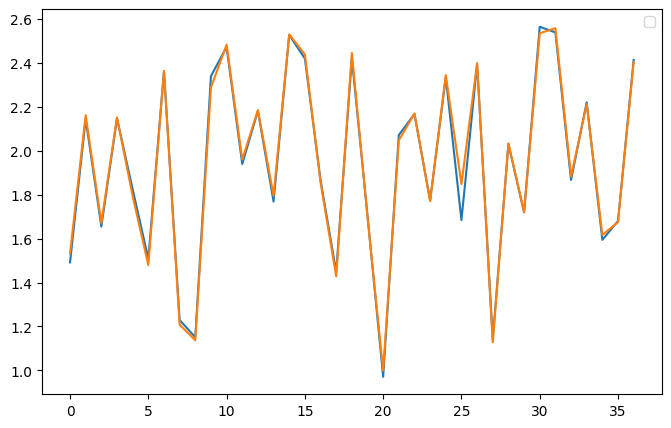

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(y_test)
plt.legend("Predicted", "Actual")
plt.show()

In [ ]:
# check for homoscadacity
fig =px.scatter(x=10**(y_test), y=10**(y_pred_elastic), labels ={'X':'Actual_value','y':'prediction'})
fig.add_shape(type ='line',line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

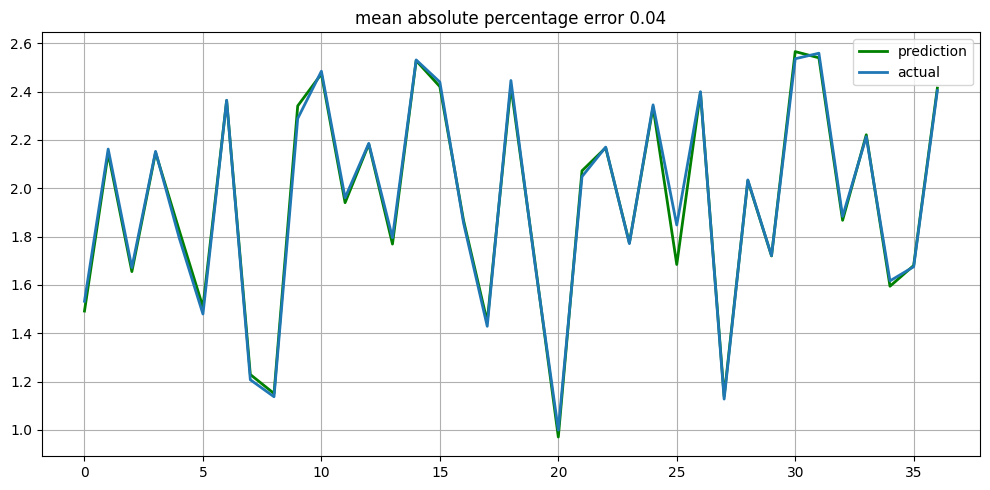

In [ ]:
# funtion to plot model performance
def plotModelResults(model, X_train= x_test, X_test = x_test, plot_intervals =False):

         #plot modelled v/s fact values
         prediction = model.predict(x_test)
         plt.figure(figsize=(10,5))
         plt.plot(prediction,"g",label="prediction",linewidth=2.0)
         plt.plot(y_test, label ="actual", linewidth=2.0)
         plt.title("mean absolute percentage error {0:.2f}".format(elastic_mape))

         plt.legend(loc="best")
         plt.tight_layout()
         plt.grid(True);


plotModelResults(en_regressor,plot_intervals=True)

**Evaluation Metric Summary**

In [ ]:
model_report = pd.DataFrame(data={'Model':['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression'], 'MSE':[lr_mse,ridge_mse,lasso1_mse,elastic_mse],'RMSE':[lr_rmse,ridge_rmse,lasso1_rmse,elastic_rmse],'MAE':[lr_mae,ridge_mae,lasso1_mae,elastic_mae],'R2_score':[lr_r2_score,ridge_r2_score,lasso1_r2_score,elastic_r2_score],'MAPE':[lr_mape,ridge_mape,lasso1_mape,elastic_mape]})

In [ ]:
model_report

,Model,MSE,RMSE,MAE,R2_score,MAPE
0,Linear Regression,69.243980,8.321297,5.019357,0.994135,0.045568
1,Ridge Regression,84.503090,9.192556,6.055799,0.992493,0.059774
2,Lasso Regression,69.782008,8.353563,5.042208,0.993800,0.043857
3,Elastic Net Regression,69.782008,8.353563,5.042208,0.993800,0.043857


### <b> Conclusion

  *  We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.  
  * A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.
  * Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.   
  * Regression models namely random forest regressor, xgboost regressor and support vector regressor were built.
  * The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.
  * Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.
  * Prophet model from facebook was implemented and predictions were made from it.







